In [4]:
import os
import json
import numpy as np
import pandas as pd
from pylab import *

mpl.rcParams['font.sans-serif'] = ['SimHei']
data_dir = 'C:/Users/san33/Work/Data/SanMu_1536367199_PixivSpider_daily_date/PixivSpider_daily_date/PixivSpider_data'

# 获取需要解析的json数据文件名
def get_dir_list(data_dir=data_dir, date_str='2010'):
    temp = 'daily_rank_' + date_str
    return [filename for filename in os.listdir(data_dir) if filename.startswith(temp) and filename.endswith('.json')]


dir_list = get_dir_list()


def get_json_data(dir_list, keys=['illust_id', 'rating_count', 'user_id', 'user_name', 'title']):
    sum_list = []
    for item in dir_list:
        with open(os.path.join(data_dir, item)) as f:
            data = json.load(f)['contents']
        frame = pd.DataFrame(data, columns=keys)
        frame['date'] = pd.to_datetime(item.split('_')[2])
        sum_list.append(frame)
            
    return sum_list


def get_tag_data(dir_list):
    tag_list = []
    for item in dir_list:
        with open(os.path.join(data_dir, item)) as f:
            data = json.load(f)['contents']
            
        for temp in data:
            frame = pd.DataFrame(temp['tags'], columns=['tags'])
            frame['illust_id'] = temp['illust_id']
            tag_list.append(frame)

    return tag_list


# temp1 = get_json_data(dir_list)
# print('get json successfully.')
# temp2 = get_tag_data(dir_list)
# print('get tag successfully.')

# pixiv_base_data = pd.concat(temp1, ignore_index=True)

# pixiv_tag_data = pd.concat(temp2, ignore_index=True)
# print('concat successfully.')


# merge_data = pd.merge(pixiv_base_data, pixiv_tag_data, on='illust_id')

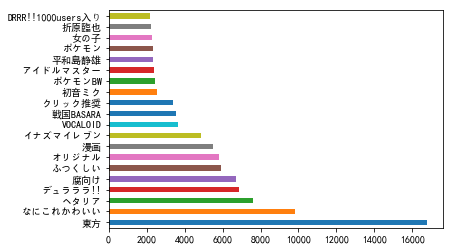

In [41]:
merge_data['tags'].value_counts()[:20].plot(kind='barh')

In [3]:
s = merge_data[merge_data['tags'] == '東方']

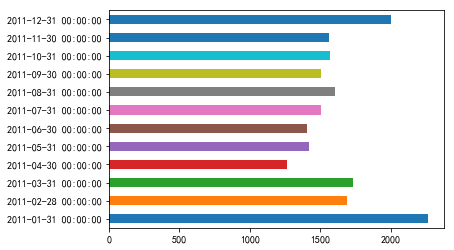

In [4]:
s['date'].value_counts().resample('M').sum().plot(kind='barh')

In [16]:
s.set_index('date').groupby(lambda x: x.month)

In [23]:
k = s.set_index('date')

In [32]:
k.index

DatetimeIndex(['2011-01-01', '2011-01-01', '2011-01-01', '2011-01-02',
               '2011-01-02', '2011-01-01', '2011-01-01', '2011-01-01',
               '2011-01-01', '2011-01-01',
               ...
               '2011-12-31', '2011-12-31', '2011-12-31', '2011-12-31',
               '2011-12-31', '2011-12-31', '2011-12-31', '2011-12-31',
               '2011-12-31', '2011-12-31'],
              dtype='datetime64[ns]', name='date', length=19504, freq=None)

In [39]:
q = k.groupby(lambda x: x.month)

In [3]:
q.size().plot(kind='line')

NameError: name 'q' is not defined

In [6]:
def get_base_csv(start=2010, end=2018):
    for i in range(start, end+1):
        temp = get_json_data(get_dir_list(date_str=str(i)))
        pixiv_base_data = pd.concat(temp, ignore_index=True)
        pixiv_base_data.to_csv('{}_base_data.csv'.format(i))

In [7]:
get_base_csv()

In [8]:
def get_tag_csv(start=2010, end=2018):
    for i in range(start, end+1):
        temp = get_tag_data(get_dir_list(date_str=str(i)))
        pixiv_tag_data = pd.concat(temp, ignore_index=True)
        pixiv_tag_data.to_csv('{}_tag_data.csv'.format(i))

In [9]:
get_tag_csv()

In [10]:
pixiv_base_data = pd.read_csv('2010_base_data.csv')

In [20]:
pixiv_base_data = pixiv_base_data.drop('Unnamed: 0', axis=1)

In [26]:
pixiv_base_data = pixiv_base_data.set_index('date')

In [33]:
pixiv_base_data.index = pd.to_datetime(pixiv_base_data.index)

In [38]:
pixiv_base_data.groupby(lambda x: x.month).size()

1     5133
2     4617
3     5086
4     7987
5     8402
6     8381
7     8624
8     8600
9     8531
10    8840
11    8339
12    8722
dtype: int64

In [2]:
def load_csv(start=2010, end=2018):
    sum_list = []
    for i in range(start, end+1):
        temp = pd.read_csv('{}_base_data.csv'.format(i))
        sum_list.append(temp)
    return sum_list

In [6]:
x = pd.concat(load_csv(), ignore_index=True)

In [7]:
def load_tag_csv(start=2010, end=2018):
    sum_list = []
    for i in range(start, end+1):
        temp = pd.read_csv('{}_tag_data.csv'.format(i))
        sum_list.append(temp)
    return sum_list

In [8]:
y = pd.concat(load_tag_csv(), ignore_index=True)

In [18]:
x.to_csv('pixiv_daily_rank_base.csv')

In [20]:
y = y.set_index('illust_id')

In [28]:
y.to_csv('pixiv_daily_rank_tag.csv')

In [38]:
y = y.reset_index()

In [42]:
y.drop_duplicates(inplace=True)

In [44]:
y = y.set_index('illust_id')

In [48]:
y.to_csv('data/Pixiv/pixiv_daily_rank_tag.csv', encoding='utf_8_sig')